In [2]:
import requests
import re

# 📥 BƯỚC 1: TẢI VĂN BẢN

url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)

# Lưu toàn bộ văn bản vào biến
raw_text = response.text

print(raw_text[:1000])



*** START OF THE PROJECT GUTENBERG EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or convers


In [3]:

# Tìm vị trí bắt đầu và kết thúc chính xác
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK 11 ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK 11 ***"

start_idx = raw_text.find(start_marker)
end_idx = raw_text.find(end_marker)

# Cắt đúng phần nội dung chính
if start_idx != -1 and end_idx != -1:
    main_text = raw_text[start_idx + len(start_marker):end_idx].strip()
else:
    print("⚠️ Không tìm thấy marker chính xác! Dùng toàn bộ văn bản.")
    main_text = raw_text

print("Length after slicing:", len(main_text))
print(main_text[:1000])  # In thử 1000 ký tự đầu


Length after slicing: 147978
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind 


In [4]:
  # BƯỚC 3: TIỀN XỬ LÝ VĂN BẢN
# Loại bỏ các dòng trống
# Chuyển về chữ thường và loại bỏ ký tự đặc biệt
cleaned_text = main_text.lower()
cleaned_text = re.sub(r'[^a-z\s]', '', cleaned_text)  # Chỉ giữ chữ cái và khoảng trắng

# Tách từ
words = cleaned_text.split()

print("Số lượng từ:", len(words))
print("10 từ đầu tiên:", words[:10])


Số lượng từ: 26464
10 từ đầu tiên: ['illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium']


In [10]:
# BƯỚC 4: PHÂN TÍCH TỪ
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Tải stopwords nếu chưa có
nltk.download('stopwords')

# Lấy stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

# Lọc bỏ stopwords khỏi danh sách từ
filtered_words = [word for word in words if word not in stop_words]

# Đếm tần suất từng từ sau khi lọc
word_counts = Counter(filtered_words)

# In tổng số từ sau khi lọc
print(f"Tổng số từ sau khi lọc stopwords: {sum(word_counts.values())}")
print(f"Số từ khác nhau sau khi lọc stopwords: {len(word_counts)}")

# Lấy 40 từ phổ biến nhất
common_words = word_counts.most_common(40)

print("🔝 Top 40 từ phổ biến nhất (đã lọc stopwords):")
for word, freq in common_words[:40]:
    print(f"{word}: {freq}")


Tổng số từ sau khi lọc stopwords: 12681
Số từ khác nhau sau khi lọc stopwords: 2630
🔝 Top 40 từ phổ biến nhất (đã lọc stopwords):
said: 462
alice: 385
little: 129
one: 101
like: 85
know: 85
would: 83
went: 83
could: 77
thought: 74
time: 68
queen: 68
see: 66
king: 61
well: 60
dont: 60
began: 58
mock: 57
im: 57
turtle: 56
quite: 55
hatter: 55
gryphon: 55
think: 53
way: 53
much: 51
say: 50
go: 50
first: 49
thing: 49
head: 48
voice: 47
get: 46
looked: 45
never: 45
come: 45
got: 45
rabbit: 44
must: 44
round: 41


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


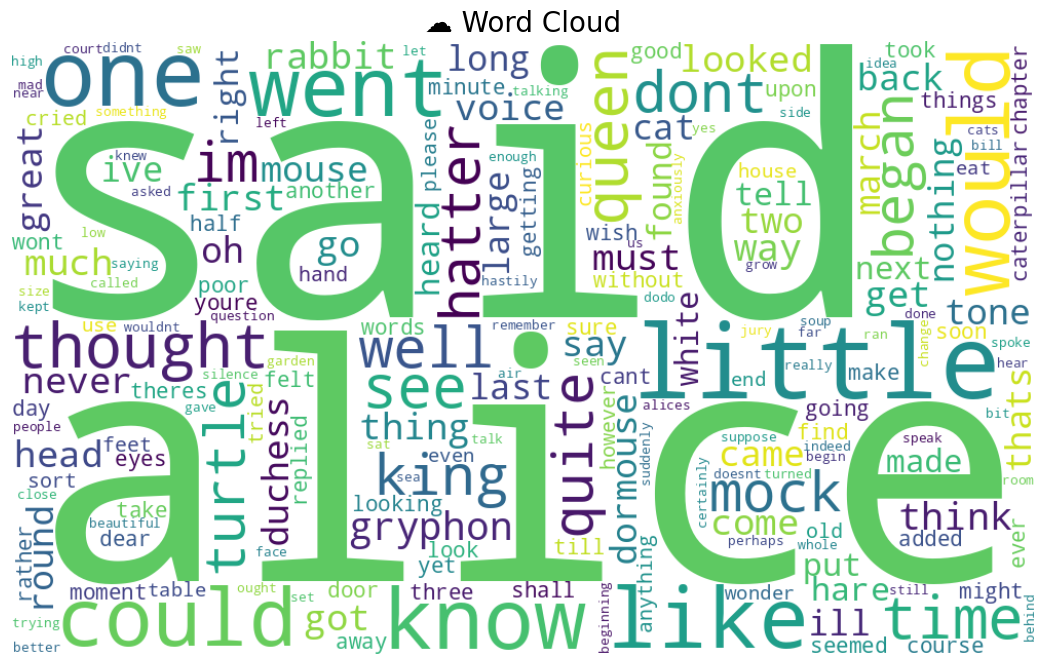

In [11]:
#Trực quan hóa tần suất từ bằng word cloud
# Tạo Word Cloud từ tần suất đã lọc
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    collocations=False  # không gộp các cụm từ
).generate_from_frequencies(word_counts)

# Hiển thị Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud", fontsize=20)
plt.show()


<ipython-input-7-37387163c825>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


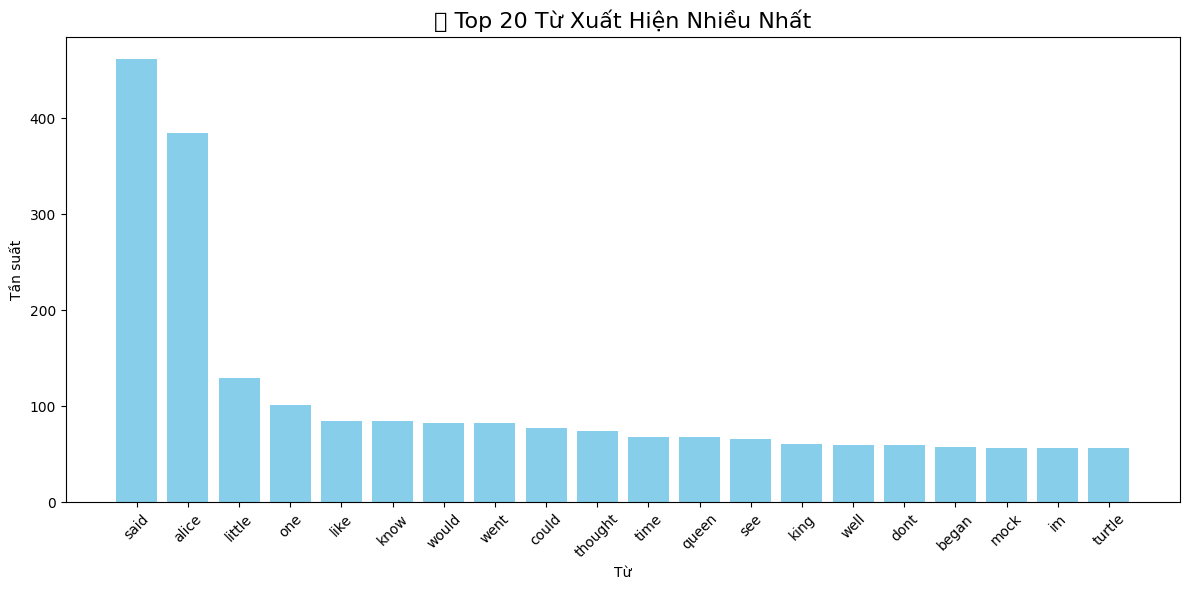

In [7]:
#Trực quan hóa tần suất từ bằng biểu đồ cột
# Lấy top 20 từ
top_words = dict(common_words[:20])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("📊 Top 20 Từ Xuất Hiện Nhiều Nhất", fontsize=16)
plt.xlabel("Từ")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()


✅ Đã load 13,452 từ GloVe
🧩 Số từ có embedding: 50


<ipython-input-8-d6817f6babb9>:38: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


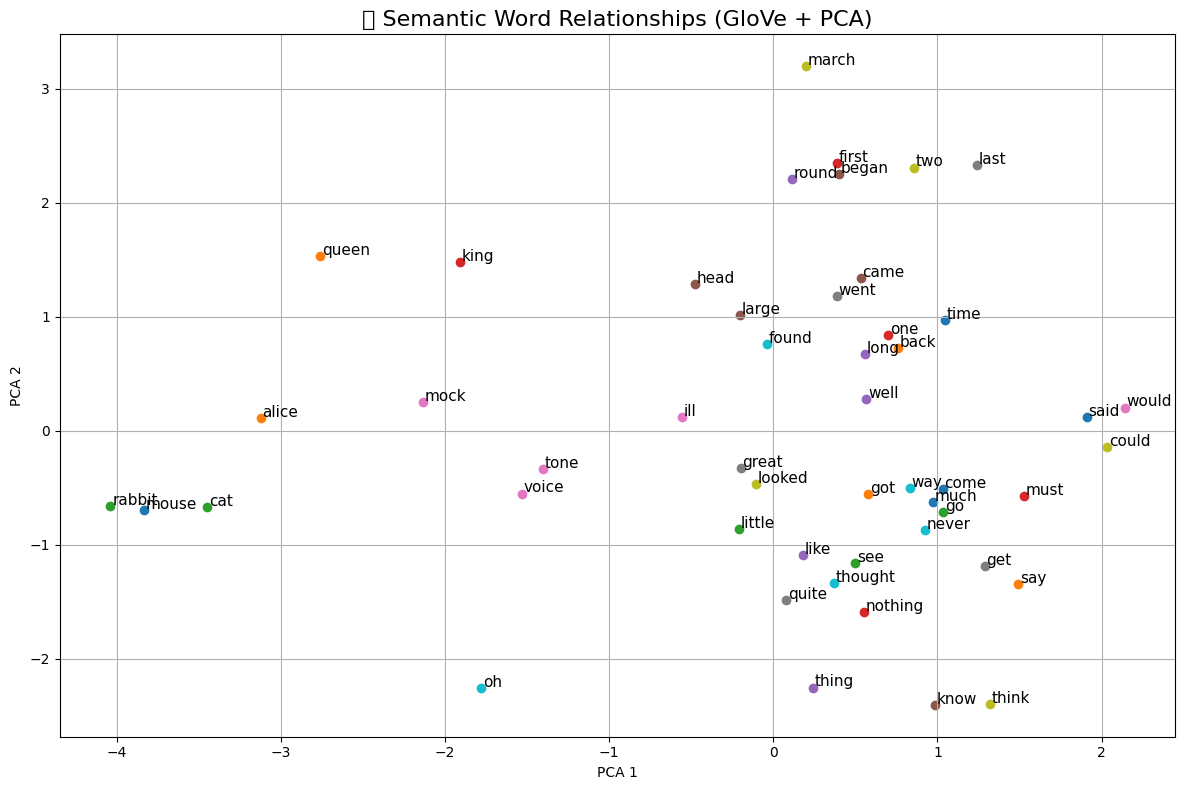

In [8]:
#Vẽ quan hệ ngữ nghĩa giữa các từ bằng GloVe embeddings và PCA
import numpy as np
from sklearn.decomposition import PCA

# === LOAD GLOVE ===
glove_path = "glove.6B.100d.txt"
embeddings = {}

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        embeddings[word] = vector

print(f"✅ Đã load {len(embeddings):,} từ GloVe")

# === LẤY VECTOR CHO 50 TỪ PHỔ BIẾN NHẤT ===
selected_words = [word for word, _ in word_counts.most_common(100) if word in embeddings][:50]
vectors = np.array([embeddings[word] for word in selected_words])

print(f"🧩 Số từ có embedding: {len(selected_words)}")

# === GIẢM CHIỀU PCA ===
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# === VẼ SCATTER PLOT ===
plt.figure(figsize=(12, 8))
for i, word in enumerate(selected_words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=11)

plt.title("📌 Semantic Word Relationships (GloVe + PCA)", fontsize=16)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-9-af264495f3dc>:18: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


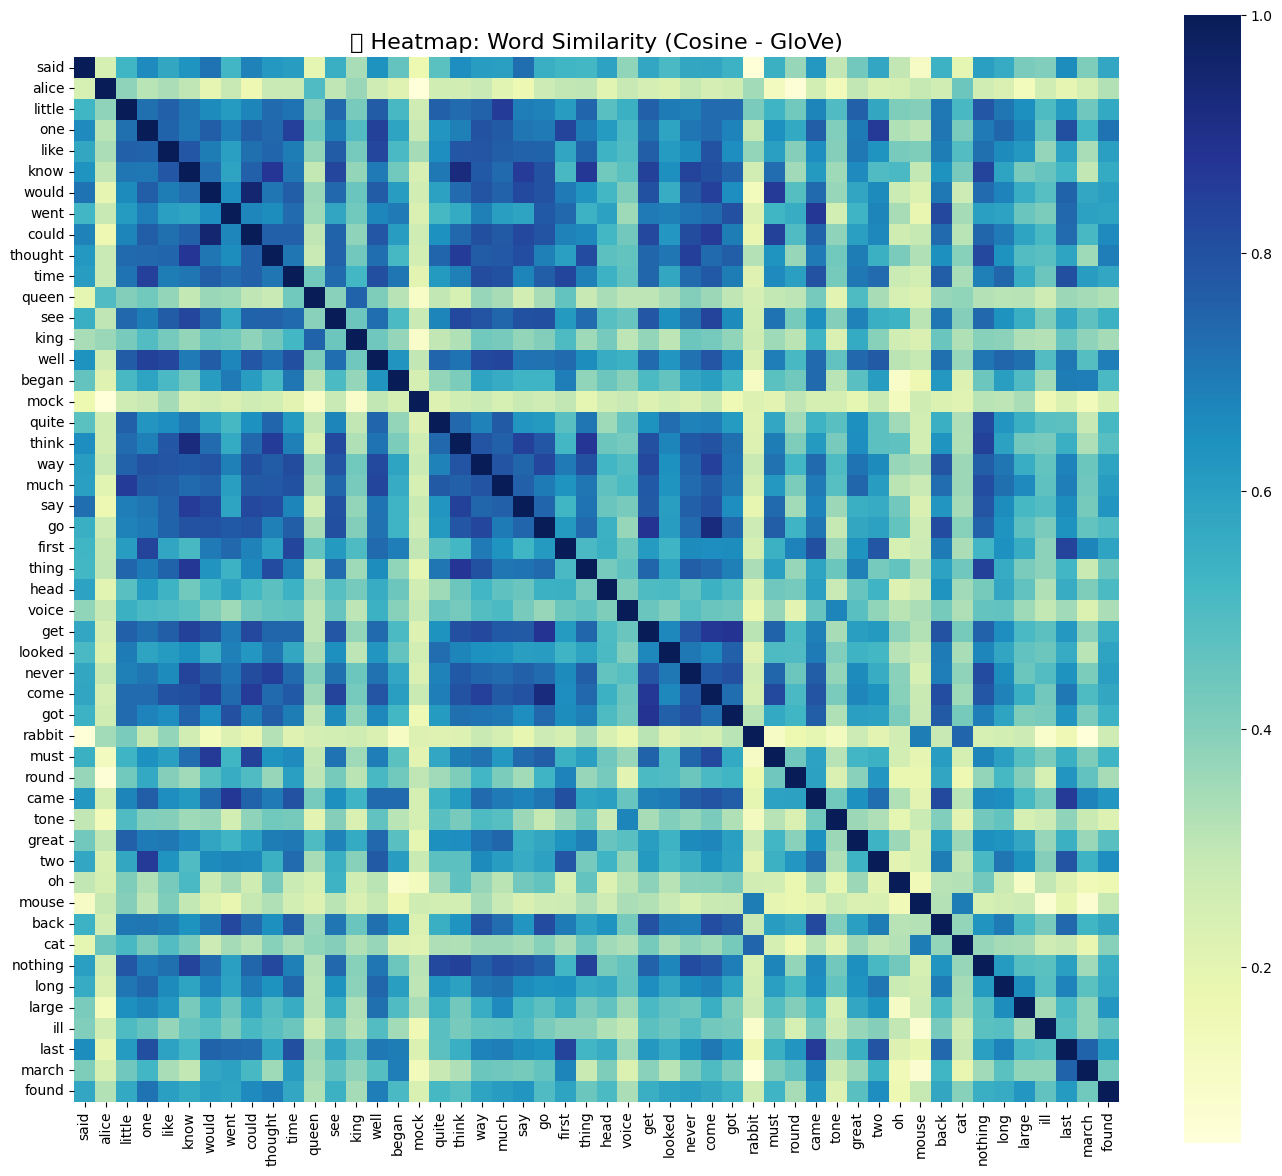

In [9]:
#Hiển thị độ tương đồng giữa các từ bằng biểu đồ nhiệt (heatmap)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# --- BƯỚC 1: TÍNH MA TRẬN ĐỘ TƯƠNG ĐỒNG ---
# vectors: danh sách vector từ GloVe tương ứng với selected_words
cos_sim_matrix = cosine_similarity(vectors)

# --- BƯỚC 2: VẼ HEATMAP ---
plt.figure(figsize=(14, 12))
sns.heatmap(cos_sim_matrix, xticklabels=selected_words, yticklabels=selected_words,
            cmap="YlGnBu", annot=False, square=True)

plt.title("🔥 Heatmap: Word Similarity (Cosine - GloVe)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
